In [16]:
import tifffile
import matplotlib.pyplot as plt
import os
import numpy as np

from skimage.io import imread, imsave

In [17]:
image_path ='/home/carolina/lgcm/dev/dvc-in-action/images/data/raw/volume_lines.tif'

save_dir='/home/carolina/lgcm/dev/dvc-in-action/images/data/input'

In [18]:
def load_tifffile(path):
    try:
        imagem = tifffile.imread(path)
        return imagem
    except Exception as e:
        print(f"Erro ao carregar a imagem: {e}")
        return None


In [19]:
image = load_tifffile(image_path)

image.shape[0]

100

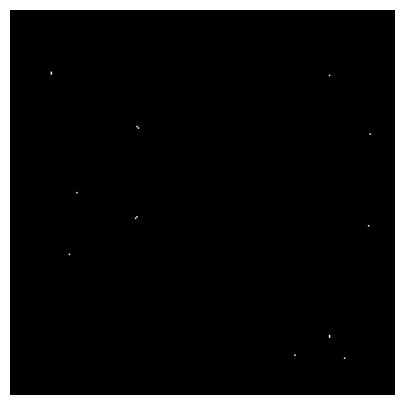

In [20]:
# Fatia 50

plt.figure(figsize=(5, 5))
plt.imshow(image[50], cmap='gray')
plt.axis('off')
plt.show()


In [21]:
def save_slice(basename, z_num, slice_data):
    """Salva uma fatia como TIFF contendo todos os canais."""
    new_filename = os.path.join(save_dir, f"{basename}_z{z_num}.tif")

    imsave(new_filename, slice_data, photometric='minisblack')

In [22]:
def cut_slice(fname, img):
    """Salva todas as fatias Z contendo os três canais juntos."""
    basename = fname.replace(".tif", "")
    num_slices = img.shape[0]

    for z_num in range(num_slices):
        slice_data = img[:, z_num] 
        save_slice(basename, z_num, slice_data)

In [23]:
cut_slice(image_path, image)

/tmp/ipykernel_118290/3238456030.py:5: UserWarning: /home/carolina/lgcm/dev/dvc-in-action/images/data/raw/volume_lines_z0.tif is a low contrast image
  imsave(new_filename, slice_data, photometric='minisblack')
/tmp/ipykernel_118290/3238456030.py:5: UserWarning: /home/carolina/lgcm/dev/dvc-in-action/images/data/raw/volume_lines_z1.tif is a low contrast image
  imsave(new_filename, slice_data, photometric='minisblack')
/tmp/ipykernel_118290/3238456030.py:5: UserWarning: /home/carolina/lgcm/dev/dvc-in-action/images/data/raw/volume_lines_z2.tif is a low contrast image
  imsave(new_filename, slice_data, photometric='minisblack')
/tmp/ipykernel_118290/3238456030.py:5: UserWarning: /home/carolina/lgcm/dev/dvc-in-action/images/data/raw/volume_lines_z3.tif is a low contrast image
  imsave(new_filename, slice_data, photometric='minisblack')
/tmp/ipykernel_118290/3238456030.py:5: UserWarning: /home/carolina/lgcm/dev/dvc-in-action/images/data/raw/volume_lines_z4.tif is a low contrast image
  imsa

In [24]:
import cv2
kernel = np.ones((5,5), dtype = "uint8")

In [25]:
def process_image(image):
    """Aplica remoção da adventícia na imagem."""
    image =  cv2.dilate(image,kernel,iterations = 1)

    return image

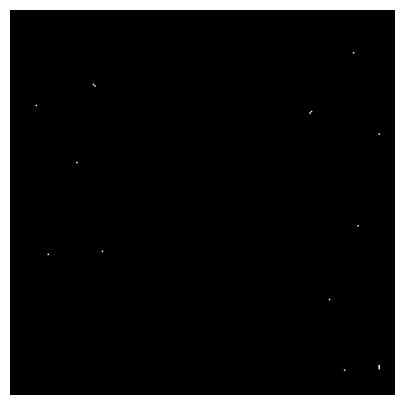

In [26]:
a = '/home/carolina/lgcm/dev/dvc-in-action/images/data/input/volume_lines_z32.tif'

plt.figure(figsize=(5, 5))
image_a = imread(a)
plt.imshow(image_a, cmap='gray')
plt.axis('off')
plt.show()

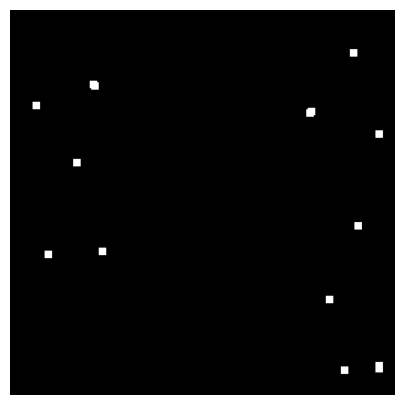

In [27]:
image_b = process_image(image_a)

plt.figure(figsize=(5, 5))
plt.imshow(image_b, cmap='gray')
plt.axis('off')
plt.show()

In [28]:
def save_slice2(basename, z_num, slice_data):
    """Salva uma fatia como TIFF contendo todos os canais."""
    new_filename = os.path.join(save_dir, f"{basename}_z{z_num}.tif")

    imsave(new_filename, slice_data, photometric='minisblack')